# Stationkeeping and structures: Library call template

To use python or Jupytter notebooks, you need to call  the following libraries before the code examples in the lecture slides and notes for them to run.

In [138]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import math

In [139]:
def xS(a,h):return a*np.arccosh(1+h/a)
def S(a,h):return h*np.sqrt(2*a/h+1)
def xB(S):return L-S
def a(Th,w):return Th/w
def X(a):return L-S(a)-xS(a)
L=800;
h=100;
Ts=1200;
w=9.81*(7.8-1.025)*300/7.8*0.001
Tp=w*h;
Th=Ts-Tp;
a=a(Th,w);
S=S(a,h);
xB=xB(S);
xS=xS(a,h);
X=xB+xS;
print(Th,a,S,xB,xS,X)


944.3740384615385 369.43588701942065 289.632832054455 510.367167945545 266.0363606251895 776.4035285707346


In [140]:
def xS(a,h):return a*np.arccosh(1+h/a)
def S(a,h):return h*np.sqrt(2*a/h+1)
def xB(S):return L-S
def a(Th,w):return Th/w
def X(Th,w,h):return xS(a(Th,w),h)+xB(S(a(Th,w),h))
L=800;
h=100;
Ts=1200;
w=9.81*(7.8-1.025)*300/7.8*0.001;
f1=3000;
Tp=Ts-w*h;
q1=X(Tp+f1,w,h)-X(Tp,w,h)

print(q1)
print(xB(S(a(Tp+f1,w),h)),xS(a(Tp+f1,w),h),X(Tp+f1,w,h))
print(xB(S(a(f1-Tp,w),h)),xS(a(f1-Tp,w),h),X(f1-Tp,w,h))



11.710432238905696
235.54883212664492 552.5651286829954 788.1139608096403
386.68321337522934 396.9933730441317 783.676586419361


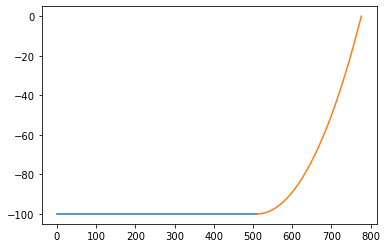

In [141]:
x1=np.linspace(0,510.367,1000)
z1=0*x1-100;

x2=np.linspace(510.367,776.404,1000)
z2=369.436*np.cosh((x2-510.367)/369.436)-369.436-100

plt.plot(x1,z1)
plt.plot(x2,z2)
plt.show()


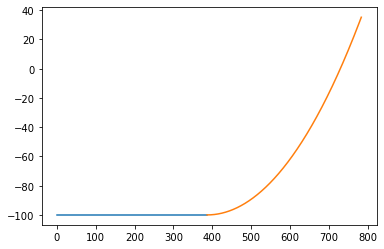

In [142]:
x5=np.linspace(0,386.683,1000)
z5=0*x5-100;

x6=np.linspace(386.683,783.677,1000)
z6=604.154*np.cosh((x6-386.683)/604.154)-604.154-100

plt.plot(x5,z5)
plt.plot(x6,z6)
plt.show()


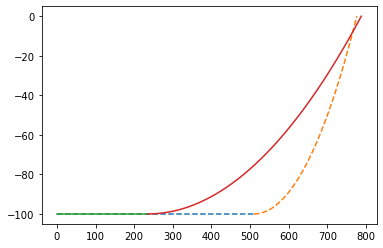

In [143]:
x1=np.linspace(0,510.367,1000)
z1=0*x1-100;

x2=np.linspace(510.367,776.404,1000)
z2=369.436*np.cosh((x2-510.367)/369.436)-369.436-100

x3=np.linspace(0,235.549,1000)
z3=0*x3-100;

x4=np.linspace(235.549,788.114,1000)
z4=1543.025*np.cosh((x4-235.549)/1543.025)-1543.025-100

plt.plot(x1,z1,linestyle="--")
plt.plot(x2,z2,linestyle="--")
plt.plot(x3,z3)
plt.plot(x4,z4)
plt.show()


In [144]:
def F(theta,F,N):return np.array([[-F*math.cos(theta)],[-F*math.sin(theta)],[N]])
def G(theta,r):
    G=np.full([3,theta.size],np.NaN)
    for i in range(theta.size):
        G[0,i]=math.cos(theta[i])
        G[1,i]=math.sin(theta[i])
        x=r*math.cos(theta[i]);y=r*math.sin(theta[i])
        G[2,i]=x*math.sin(theta[i])-y*math.cos(theta[i])
    return G
def pinv(M):
    MMT=np.dot(M,M.transpose())
    return np.dot(M.transpose(),np.linalg.pinv(MMT))


theta_F=150;force_env=500
F_R=-F(np.radians(theta_F),force_env,0)

theta_moorings=np.array([90,180,270,360])
radius_platform=20
Tp=1200

G_M=G(np.radians(theta_moorings),radius_platform)
Ginv=pinv(G_M)

T=np.dot(Ginv,F_R)+Tp

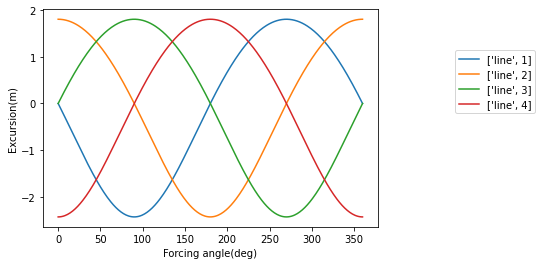

In [145]:
theta_moorings=np.array([90,180,270,360])
theta=np.linspace(0,360,360)
X_all=np.full([theta_moorings.size,theta.size],np.NaN)

for i in range(theta.size):
    F_R=F(np.radians(theta[i]),force_env,0)
    T=np.dot(Ginv,F_R)+Tp
    
    for j in range(theta_moorings.size):
        X_all[j,i]=X(float(T[j]),w,h)-X(float(Tp),w,h)
        
for j in range(theta_moorings.size):
    plt.plot(theta,X_all[j,:],label=['line',j+1])
plt.legend(bbox_to_anchor=(1.35,0.5),loc='lower center');
plt.ylabel(r'Excursion(m)');plt.xlabel(r'Forcing angle(deg)');
plt.show()

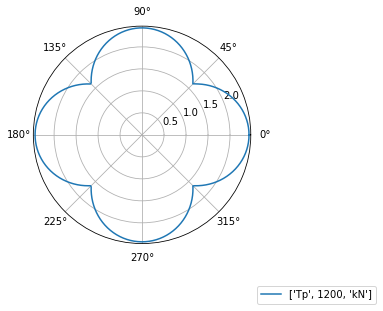

In [146]:
X_max=np.full([theta.size],np.NaN)

for i in range(theta.size):
    X_max[i]=max(abs(X_all[:,i]))
    
plt.polar(np.radians(theta),X_max,label=['Tp',Tp,'kN'])
plt.legend(bbox_to_anchor=(1.6,-0.3),loc='lower right')
plt.show()

In [166]:
Cat=0.1;Can=2.0;Bmt=0.156;Bmn=0.102
Bdt=3.79;Cdt=0.08;Bdn=0.46;Cdn=0.97
Cd=Bdt*Cdt+Bdn*Cdn

vv_std=2.3;a_std=1.3
w=2556.26;
g=9.81;
rho=1025;
D=0.2;
h=100;
Ts=1200E3
Th=Ts-w*h
f1=3000E3


M_at=Bmt*(w/g+0.5*rho*np.pi*D**2*Cat)
M_an=Bmn*(w/g+0.5*rho*np.pi*D**2*Can)
Ma=M_at+M_an
M0=h*w/g+h*(M_at)

dtau=(Ts-w*h)/(w*h)
Mt=M0+(S(a(Th+f1,w),h)-h)/(dtau)*Ma

Tdyn=Mt*(1+dtau)*a_std+0.5*rho*Cd*dtau*h*D*vv_std

print(Tdyn)

312140.5596900487


In [ ]:
                      
'''w=9.8*(7.8-1.025)*300/7.8*0.001
print(w)
L=800
h=100
Ts=1200
Tp=w*h
Th=Ts-Tp
a=a(Th,w)
S=S(a,h)
xB=xB(S)
xS=xS(a,h)
X=xB+xS
print(Th,a,S,xB,xS,X)
'''